<a href="https://colab.research.google.com/github/kleineidam/LeafTransport/blob/main/ants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt

# No memory

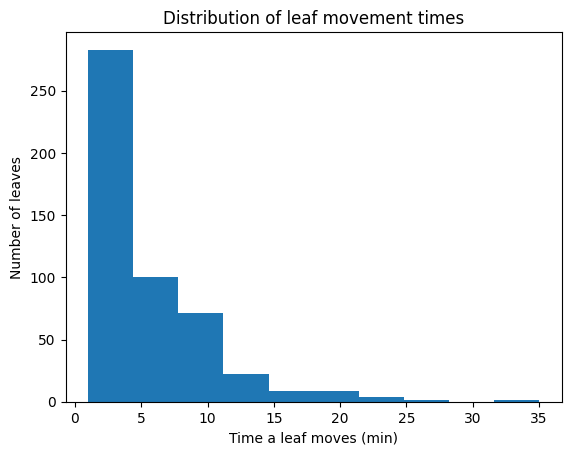

In [27]:
leaves = np.zeros(500)

for i in range(len(leaves)):
    for _ in range(100):
        leaves[i] += 1
        if np.random.randint(100) > 80:
            break

plt.hist(leaves)
plt.xlabel("Time a leaf moves (min)")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf movement times")
plt.show()


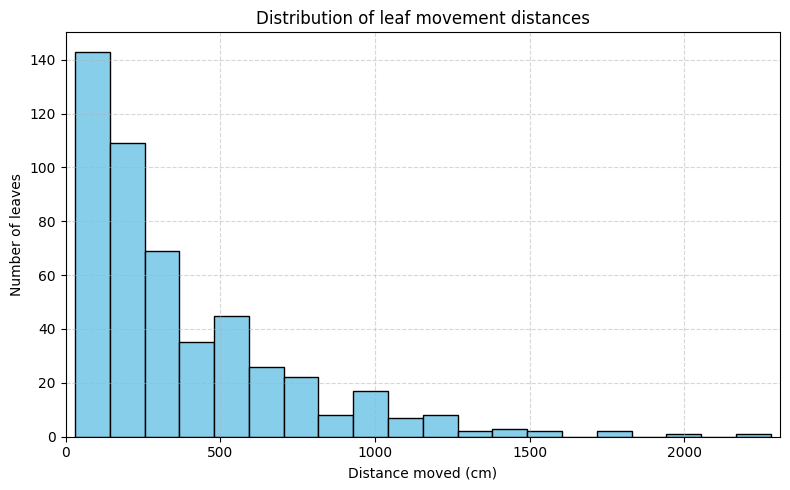

In [32]:
# Initialize 500 leaves
leaves = np.zeros(500)

# Simulate leaf movement
for i in range(len(leaves)):
    for _ in range(100):
        leaves[i] += 1
        if np.random.randint(100) > 91:  # ~8% chance of dropping at each step
            break

# Convert steps to distance: 1 step = 30 cm
leaves_distance = leaves * 30  # distance in cm

# Plot histogram
plt.figure(figsize=(8, 5))  # make the plot a bit larger
plt.hist(leaves_distance, bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Distance moved (cm)")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf movement distances")

# Adjust x-axis limits dynamically
plt.xlim(0, np.max(leaves_distance) + 30)  # leave small margin at the right

plt.grid(True, linestyle='--', alpha=0.5)  # optional: add a grid
plt.tight_layout()  # improve spacing
plt.show()



with start (pickup probability

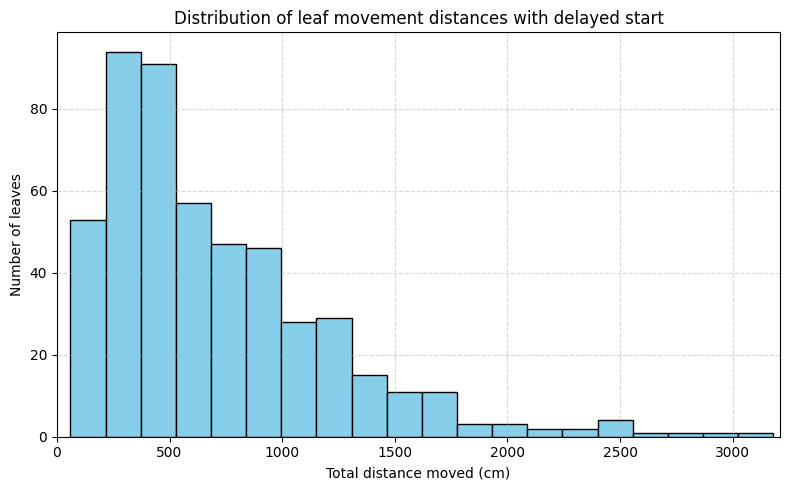

In [34]:
# Initialize 500 leaves
leaves = np.zeros(500)

# Simulate leaf movement
for i in range(len(leaves)):
    # First: waiting time before starting
    waiting_time = 0
    while True:
        waiting_time += 1
        if np.random.rand() < 0.10:  # 10% chance to start each minute
            break

    # Now start moving
    steps = 0
    for _ in range(100):
        steps += 1
        if np.random.randint(100) > 91:  # ~8% chance of dropping
            break

    # Total time = waiting time + movement time
    leaves[i] = (waiting_time + steps) * 30  # convert to distance (30 cm per min)

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(leaves, bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Total distance moved (cm)")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf movement distances with delayed start")
plt.xlim(0, np.max(leaves) + 30)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


repeated pickup

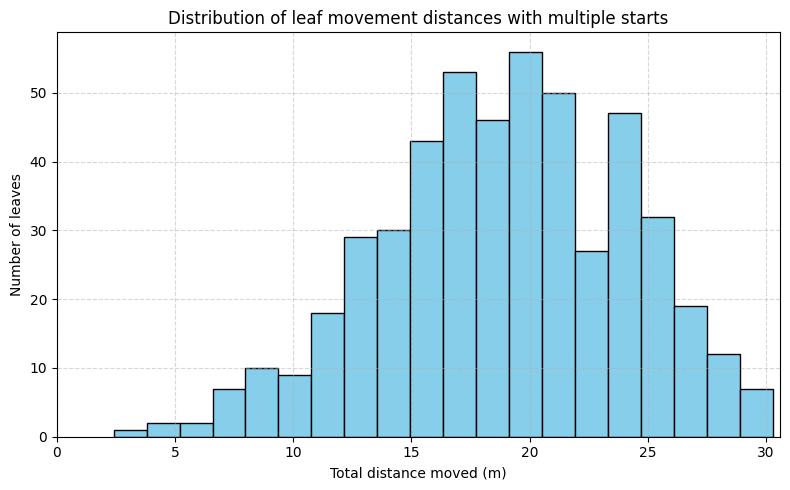

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize 500 leaves
leaves = np.zeros(500)

# Parameters
max_total_minutes = 120  # simulate for up to 1000 minutes
step_distance = 0.30  # m per minute

for i in range(len(leaves)):
    total_distance = 0
    total_minutes = 0

    while total_minutes < max_total_minutes:
        # Waiting phase before starting
        while True:
            total_minutes += 1
            if np.random.rand() < 0.10:  # 10% chance per minute to start
                break
            if total_minutes >= max_total_minutes:
                break

        if total_minutes >= max_total_minutes:
            break

        # Movement phase
        while True:
            total_distance += step_distance
            total_minutes += 1

            if np.random.randint(100) > 91:  # ~8% chance of dropping
                break

            if total_minutes >= max_total_minutes:
                break

    leaves[i] = total_distance

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(leaves, bins=20, color='skyblue', edgecolor='black')

plt.xlabel("Total distance moved (m)")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf movement distances with multiple starts")
plt.xlim(0, np.max(leaves) + step_distance)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


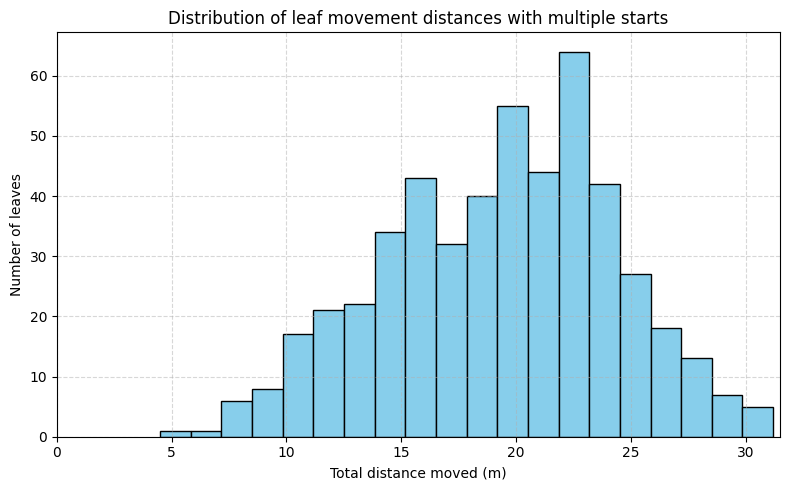

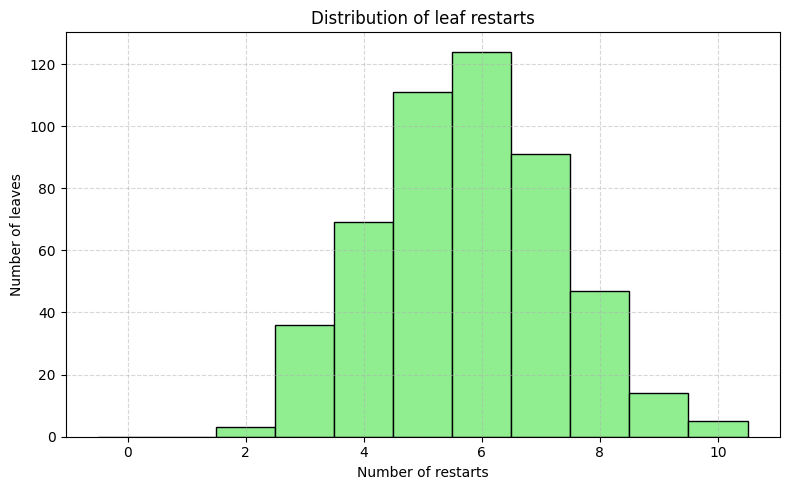

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Initialize 500 leaves
leaves = np.zeros(500)
restarts = np.zeros(500)  # count restarts

# Parameters
max_total_minutes = 120  # simulate for up to 1000 minutes
step_distance = 0.30  # m per minute

for i in range(len(leaves)):
    total_distance = 0
    total_minutes = 0
    restart_count = 0

    while total_minutes < max_total_minutes:
        # Waiting phase before starting
        while True:
            total_minutes += 1
            if np.random.rand() < 0.10:  # 10% chance per minute to start
                restart_count += 1  # count restart when movement starts
                break
            if total_minutes >= max_total_minutes:
                break

        if total_minutes >= max_total_minutes:
            break

        # Movement phase
        while True:
            total_distance += step_distance
            total_minutes += 1

            if np.random.randint(100) > 91:  # ~8% chance of dropping
                break

            if total_minutes >= max_total_minutes:
                break

    leaves[i] = total_distance
    restarts[i] = restart_count

# Plot histogram of distances
plt.figure(figsize=(8, 5))
plt.hist(leaves, bins=20, color='skyblue', edgecolor='black')
plt.xlabel("Total distance moved (m)")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf movement distances with multiple starts")
plt.xlim(0, np.max(leaves) + step_distance)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot histogram of restart counts
plt.figure(figsize=(8, 5))
plt.hist(restarts, bins=range(int(restarts.max())+2), color='lightgreen', edgecolor='black', align='left')
plt.xlabel("Number of restarts")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf restarts")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


two types of leaves

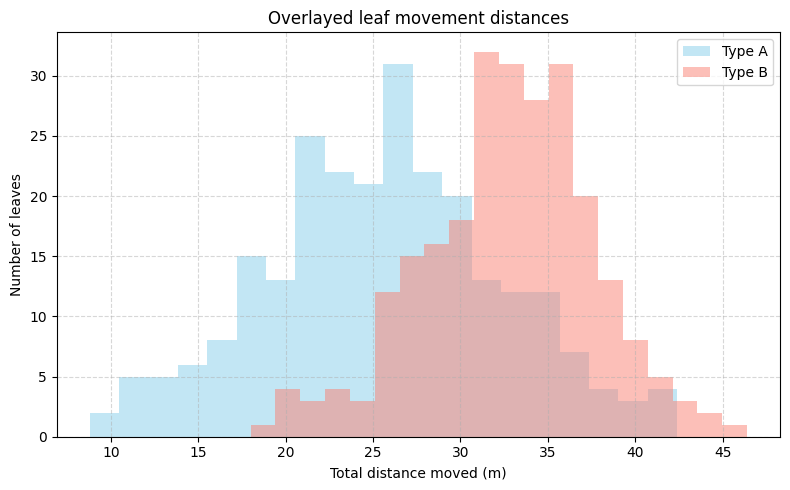

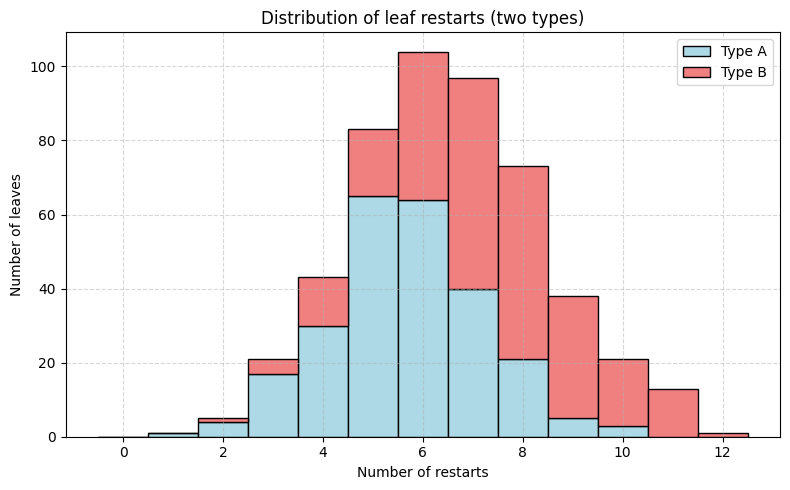

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_leaves_A = 250
num_leaves_B = 250
total_leaves = num_leaves_A + num_leaves_B

max_total_minutes = 120  # simulate for 120 minutes
step_distance = 0.4  # meters per minute

# Probabilities for Type A
start_prob_A = 0.10  # 10% chance per minute to start
drop_prob_A = 0.08   # 8% chance per minute to drop

# Probabilities for Type B
start_prob_B = 0.20  # 20% chance per minute to start
drop_prob_B = 0.08   # 8% chance per minute to drop

# Initialize arrays
leaves_distance = np.zeros(total_leaves)
restarts = np.zeros(total_leaves)

# Simulate for each leaf
for i in range(total_leaves):

    # Select which type the leaf is
    if i < num_leaves_A:
        start_prob = start_prob_A
        drop_prob = drop_prob_A
    else:
        start_prob = start_prob_B
        drop_prob = drop_prob_B

    total_distance = 0
    total_minutes = 0
    restart_count = 0

    while total_minutes < max_total_minutes:
        # Waiting phase
        while True:
            total_minutes += 1
            if np.random.rand() < start_prob:
                restart_count += 1
                break
            if total_minutes >= max_total_minutes:
                break

        if total_minutes >= max_total_minutes:
            break

        # Movement phase
        while True:
            total_distance += step_distance
            total_minutes += 1

            if np.random.rand() < drop_prob:
                break

            if total_minutes >= max_total_minutes:
                break

    leaves_distance[i] = total_distance
    restarts[i] = restart_count

# Plot histogram of distances
plt.figure(figsize=(8, 5))
plt.hist(leaves_distance[:num_leaves_A], bins=20, color='skyblue', alpha=0.5, label='Type A')
plt.hist(leaves_distance[num_leaves_A:], bins=20, color='salmon', alpha=0.5, label='Type B')
plt.xlabel("Total distance moved (m)")
plt.ylabel("Number of leaves")
plt.title("Overlayed leaf movement distances")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Plot histogram of restarts
plt.figure(figsize=(8, 5))
plt.hist([restarts[:num_leaves_A], restarts[num_leaves_A:]],
         bins=range(int(restarts.max())+2), stacked=True,
         label=['Type A', 'Type B'], color=['lightblue', 'lightcoral'],
         edgecolor='black', align='left')
plt.xlabel("Number of restarts")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf restarts (two types)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


leaves are arriving in the first hour, drawn from a normal distribution

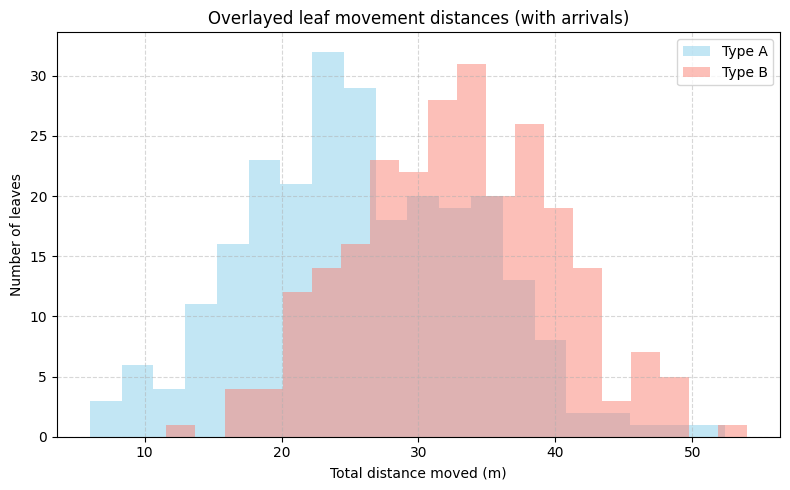

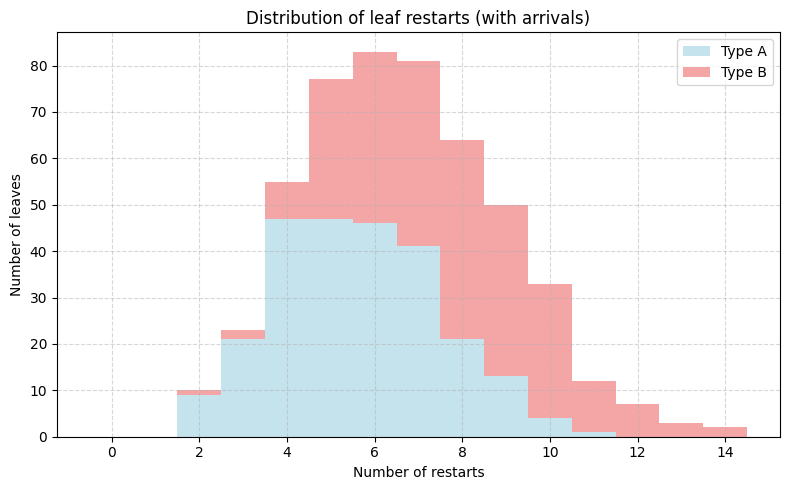

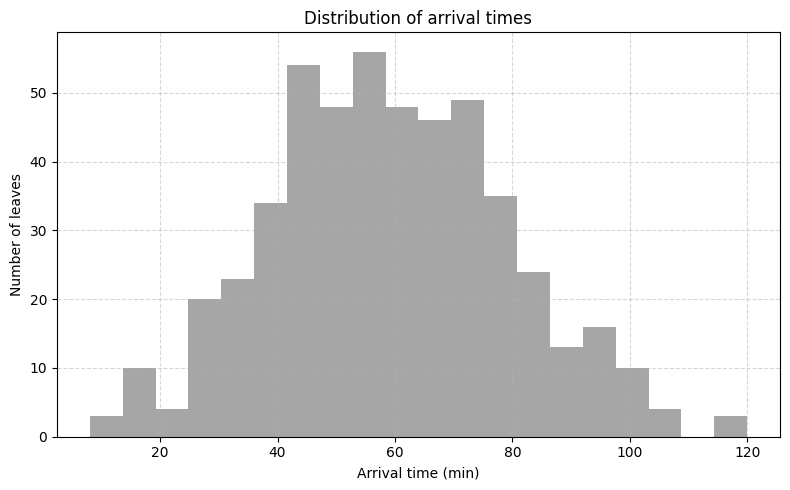

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters
num_leaves_A = 250
num_leaves_B = 250
total_leaves = num_leaves_A + num_leaves_B

max_total_minutes = 180  # total simulation duration
step_distance = 0.4  # meters per minute

# Probabilities for Type A
start_prob_A = 0.10  # 10% chance per minute to start
drop_prob_A = 0.08   # 8% chance per minute to drop

# Probabilities for Type B
start_prob_B = 0.20  # 20% chance per minute to start
drop_prob_B = 0.09   # 8% chance per minute to drop

# Generate arrival times (normal distribution, clipped to 0-60 min)
arrival_mean = 60
arrival_std = 20
arrival_times = np.clip(np.random.normal(arrival_mean, arrival_std, total_leaves), 0, 120)

# Initialize arrays
leaves_distance = np.zeros(total_leaves)
restarts = np.zeros(total_leaves)

# Simulate for each leaf
for i in range(total_leaves):

    # Select type
    if i < num_leaves_A:
        start_prob = start_prob_A
        drop_prob = drop_prob_A
    else:
        start_prob = start_prob_B
        drop_prob = drop_prob_B

    total_distance = 0
    total_minutes = arrival_times[i]  # start counting after arrival
    restart_count = 0

    while total_minutes < max_total_minutes:
        # Waiting phase
        while True:
            total_minutes += 1
            if np.random.rand() < start_prob:
                restart_count += 1
                break
            if total_minutes >= max_total_minutes:
                break

        if total_minutes >= max_total_minutes:
            break

        # Movement phase
        while True:
            total_distance += step_distance
            total_minutes += 1

            if np.random.rand() < drop_prob:
                break

            if total_minutes >= max_total_minutes:
                break

    leaves_distance[i] = total_distance
    restarts[i] = restart_count

# Plot histogram of distances
plt.figure(figsize=(8, 5))
plt.hist(leaves_distance[:num_leaves_A], bins=20, color='skyblue', alpha=0.5, label='Type A')
plt.hist(leaves_distance[num_leaves_A:], bins=20, color='salmon', alpha=0.5, label='Type B')
plt.xlabel("Total distance moved (m)")
plt.ylabel("Number of leaves")
plt.title("Overlayed leaf movement distances (with arrivals)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot histogram of restarts
plt.figure(figsize=(8, 5))
plt.hist([restarts[:num_leaves_A], restarts[num_leaves_A:]],
         bins=range(int(restarts.max())+2), stacked=True,
         label=['Type A', 'Type B'], color=['lightblue', 'lightcoral'],
         align='left', alpha=0.7)
plt.xlabel("Number of restarts")
plt.ylabel("Number of leaves")
plt.title("Distribution of leaf restarts (with arrivals)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# (Optional: plot arrival distribution itself)
plt.figure(figsize=(8, 5))
plt.hist(arrival_times, bins=20, color='gray', alpha=0.7)
plt.xlabel("Arrival time (min)")
plt.ylabel("Number of leaves")
plt.title("Distribution of arrival times")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


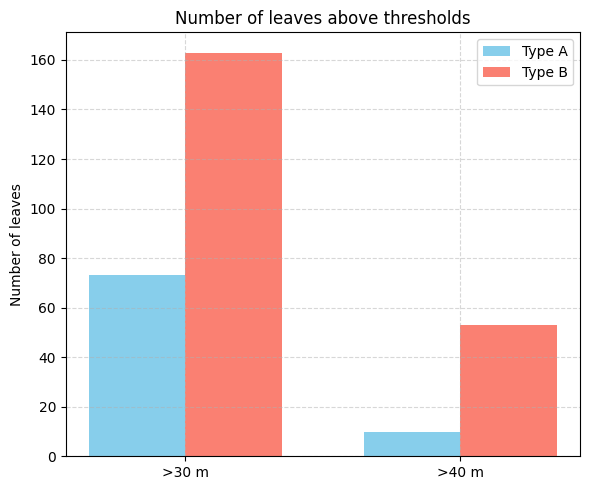

In [57]:
# Thresholds
thresholds = [30, 40]

# Prepare counts
counts_A = []
counts_B = []

for threshold in thresholds:
    counts_A.append(np.sum(leaves_distance[:num_leaves_A] > threshold))
    counts_B.append(np.sum(leaves_distance[num_leaves_A:] > threshold))

# Bar plot
bar_width = 0.35
x = np.arange(len(thresholds))

plt.figure(figsize=(6, 5))
plt.bar(x - bar_width/2, counts_A, width=bar_width, color='skyblue', label='Type A')
plt.bar(x + bar_width/2, counts_B, width=bar_width, color='salmon', label='Type B')

plt.xticks(x, [f">{t} m" for t in thresholds])
plt.ylabel("Number of leaves")
plt.title("Number of leaves above thresholds")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


An animation



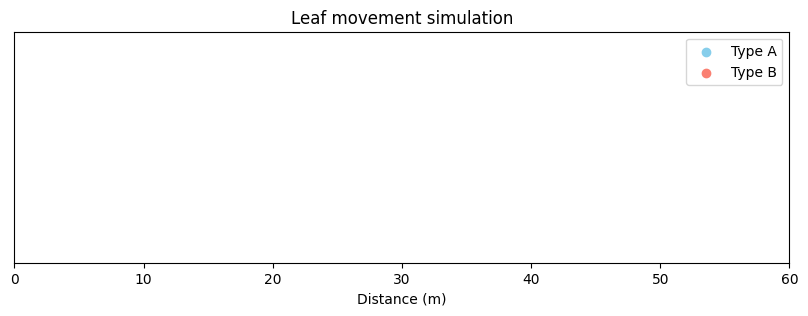

In [67]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parameters
num_leaves_A = 50  # reduce for faster animation
num_leaves_B = 50
total_leaves = num_leaves_A + num_leaves_B

max_total_minutes = 180
step_distance = 0.4

start_prob_A = 0.10
drop_prob_A = 0.08
start_prob_B = 0.20
drop_prob_B = 0.08

# Arrival times (clipped normal distribution)
arrival_mean = 60
arrival_std = 20
arrival_times = np.clip(np.random.normal(arrival_mean, arrival_std, total_leaves), 0, 120)

# Initialize states
positions = np.zeros(total_leaves)
states = np.zeros(total_leaves, dtype=bool)  # True = moving
minutes = np.zeros(total_leaves)
done = np.zeros(total_leaves, dtype=bool)

# Type assignment
types = np.array(['A'] * num_leaves_A + ['B'] * num_leaves_B)

# Create vertical positions with jitter
y_positions = np.where(types == 'A', 0, 1) + np.random.normal(0, 0.05, total_leaves)

# Set up plot
fig, ax = plt.subplots(figsize=(10, 3))
sc_A = ax.scatter([], [], color='skyblue', label='Type A')
sc_B = ax.scatter([], [], color='salmon', label='Type B')
ax.set_xlim(0, 60)
ax.set_ylim(-0.5, 1.5)
ax.set_xlabel("Distance (m)")
ax.set_yticks([])
ax.legend()
ax.set_title("Leaf movement simulation")

# Update function
def update(frame):
    global positions, states, minutes, done

    for i in range(total_leaves):
        if done[i]:
            continue

        minutes[i] += 1

        if minutes[i] < arrival_times[i]:
            continue  # leaf not yet arrived

        if not states[i]:  # waiting to start
            if np.random.rand() < (start_prob_A if types[i]=='A' else start_prob_B):
                states[i] = True

        if states[i]:
            positions[i] += step_distance
            if np.random.rand() < (drop_prob_A if types[i]=='A' else drop_prob_B):
                states[i] = False  # dropped

        if minutes[i] >= max_total_minutes:
            done[i] = True

    # Update scatter data
    # In update():
    sc_A.set_offsets(np.column_stack((positions[types == 'A'], y_positions[types == 'A'])))
    sc_B.set_offsets(np.column_stack((positions[types == 'B'], y_positions[types == 'B'])))
    ax.set_title(f"Leaf movement simulation - Minute {frame}")
    return sc_A, sc_B

plt.show()
import matplotlib.animation as animation
from IPython.display import HTML

ani = animation.FuncAnimation(fig, update, frames=max_total_minutes, interval=100, blit=True)

# Render as HTML video inside notebook
HTML(ani.to_jshtml())
# Save as mp4 (recommended)
ani.save("leaf_simulation.mp4", writer='ffmpeg', fps=10)

# Memory

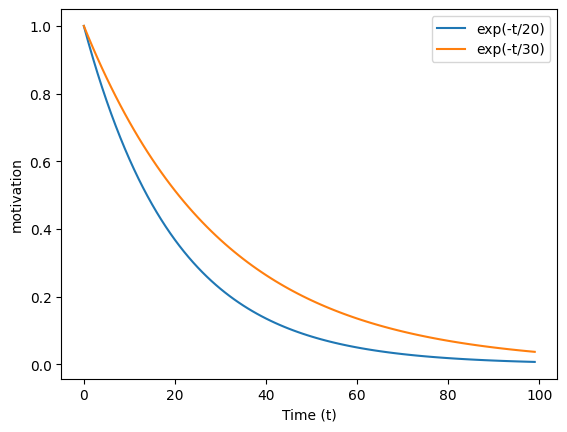

In [ ]:
t = np.arange(100)

# First plot
plt.plot(t, np.exp(-t/20), label="exp(-t/20)")

# Second plot — for example, a linear decay
plt.plot(t, np.exp(-t/30), label="exp(-t/30)")
# Add legend and labels (optional but good practice)
plt.xlabel("Time (t)")
plt.ylabel("motivation")
plt.legend()
plt.grid(False)

plt.show()

**Playground**

generate leaves

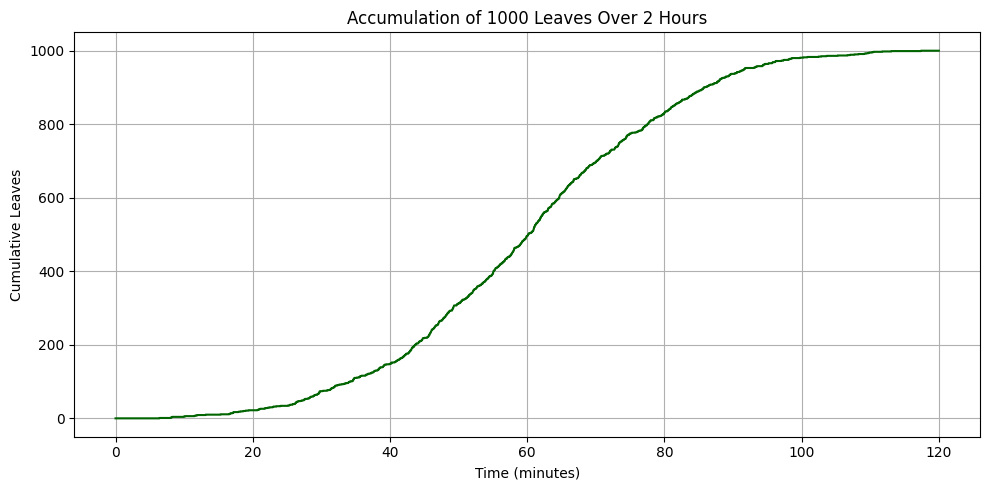

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Simulation setup ---
duration_seconds = 2 * 60 * 60  # 2 hours = 7200 seconds
time = np.arange(duration_seconds)

# Gaussian shape for generation probability (peaks at 1 hour)
peak_time = duration_seconds / 2
std_dev = duration_seconds / 6  # wide spread (~2 std covers the 2-hour span)

# Probability density (not yet normalized)
pdf = np.exp(-0.5 * ((time - peak_time) / std_dev) ** 2)
pdf /= pdf.sum()  # normalize to sum to 1

# Total leaves to generate
total_leaves = 1000

# Generate number of leaves per second using multinomial distribution
leaf_counts_per_sec = np.random.multinomial(total_leaves, pdf)

# Accumulate
cumulative_leaves = np.cumsum(leaf_counts_per_sec)

# --- Plot ---
plt.figure(figsize=(10, 5))
plt.plot(time / 60, cumulative_leaves, color='darkgreen')
plt.title("Accumulation of 1000 Leaves Over 2 Hours")
plt.xlabel("Time (minutes)")
plt.ylabel("Cumulative Leaves")
plt.grid(True)
plt.tight_layout()
plt.show()
